In [3]:
import numpy as np
import matplotlib.pyplot as plt
import py4DSTEM
import hyperspy.api as hs
from pathlib import Path
import gc

In [13]:
#load the raw data and visualize it, 
filepath = r"../../data/raw/4D-STEM_data_for_anthracene/Mg30157/20220509_182024_data_binned2.hdf5"

#CHECK HOW TO LOAD METADATA (if necessary)
py4DSTEM.print_h5_tree(filepath)

s = hs.load(filepath, reader='HSPY')
datacube = py4DSTEM.DataCube(s.data)

/
|---Experiments
    |---__unnamed__
        |---axis-0
        |---axis-1
        |---axis-2
        |---axis-3
        |---learning_results
        |---metadata
        |   |---General
        |   |---Signal
        |   |---_HyperSpy
        |       |---Folding
        |---original_metadata


WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signal. Consider installing pyxem to load this dataset into its original signal class. (hyperspy.io:801)
WARNING | Hyperspy | `signal_type='electron_diffraction'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:745)


Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.


In 4D-STEM, the data format is
- A 2D scan in real space with probe positions on the sample: $(x,y)$
- at each probe position $(x,y)$, a 2D diffraction pattern is $(k_x, k_y)$
- Hence the $\text{datacube}[i,j,m,n] = I(x_i, y_j, k_{x_m}, k_{y_n})$

In [21]:
s.inav[:,:].data.shape

(255, 255, 257, 257)

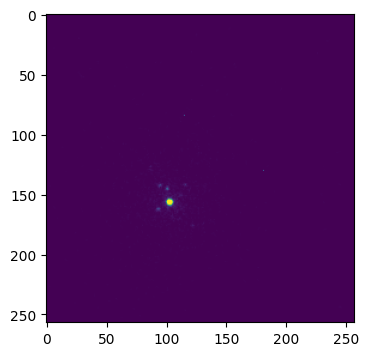

In [16]:
plt.figure(figsize=(4,4))
plt.imshow(datacube[0,0, :, :])
plt.show()

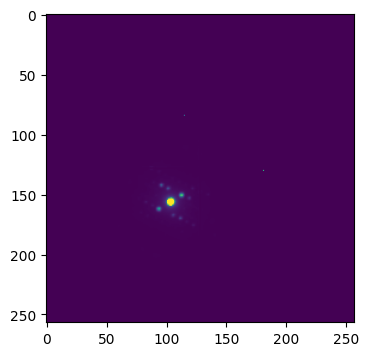

In [23]:
test_mean = np.mean(s.inav[:,:].data, axis=(0,1))
plt.figure(figsize=(4,4))
plt.imshow(test_mean, vmax = 100)
plt.show()

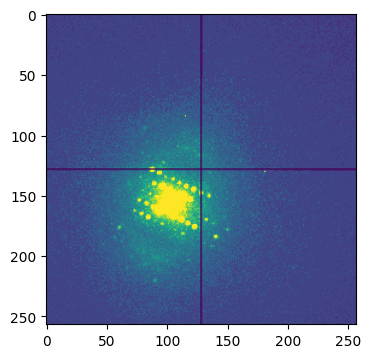

In [26]:
test_max = np.max(s.inav[:,:].data, axis=(0,1)) #in hyperspy we use inav and isig to move in the real and momentum spaces respectively
plt.figure(figsize=(4,5))
plt.imshow(test_max, vmax = 20) #max value is only 252. lowering the visualization vmax shows the background noise
plt.show()

## Loop thorught all data

In [4]:
root = Path("../../data/raw")

for f in sorted(root.rglob("*.hdf5")):
    try:
        s = hs.load(f, reader="HSPY", lazy=True)
        print(f, s.data.shape)

    except Exception as e:
        print(f"{f} FAILED: {e}")

    finally:
        del s
        gc.collect()

    # DELETE FILE AFTER USE
    f.unlink()


WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signal. Consider installing pyxem to load this dataset into its original signal class. (hyperspy.io:801)
WARNING | Hyperspy | `signal_type='electron_diffraction'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:745)
../../data/raw/4D-STEM_data_for_anthracene/Mg30157/20220509_182024_data_binned2.hdf5 (255, 255, 257, 257)
WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signal. Consider installing pyxem to load this dataset into its original signal class. (hyperspy.io:801)
WARNING | Hyperspy | `signal_type='electron_diffraction'` not unde

Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.


../../data/raw/4D-STEM_data_for_anthracene/Mg30157/20220509_183737_data_binned2.hdf5 (255, 255, 257, 257)
WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signal. Consider installing pyxem to load this dataset into its original signal class. (hyperspy.io:801)
WARNING | Hyperspy | `signal_type='electron_diffraction'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:745)
../../data/raw/4D-STEM_data_for_anthracene/Mg30157/20220509_194940_data_binned2.hdf5 (255, 255, 257, 257)
WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signal. Consider installing pyxem to load this dataset into its o

Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.


../../data/raw/4D-STEM_data_for_p-terphenyl/4D-STEM data for p-terphenyl/Mg30157/20220510_093618_data_binned2.hdf5 (255, 255, 257, 257)
WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signal. Consider installing pyxem to load this dataset into its original signal class. (hyperspy.io:801)
WARNING | Hyperspy | `signal_type='electron_diffraction'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:745)
../../data/raw/4D-STEM_data_for_p-terphenyl/4D-STEM data for p-terphenyl/Mg30157/20220510_093908_data_binned2.hdf5 (255, 255, 257, 257)
WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signa

Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.


../../data/raw/4D-STEM_data_for_p-terphenyl/4D-STEM data for p-terphenyl/Mg30160/20220904_104733_data_binned2.hdf5 (255, 255, 257, 257)
WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signal. Consider installing pyxem to load this dataset into its original signal class. (hyperspy.io:801)
WARNING | Hyperspy | `signal_type='electron_diffraction'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:745)
../../data/raw/4D-STEM_data_for_p-terphenyl/4D-STEM data for p-terphenyl/Mg30160/20220904_105044_data_binned2.hdf5 (255, 255, 257, 257)
WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signa

Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.


../../data/raw/4D-STEM_data_for_p-terphenyl/4D-STEM data for p-terphenyl/Mg31258/20220322_182433_data_binned2.hdf5 (255, 255, 257, 257)
WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signal. Consider installing pyxem to load this dataset into its original signal class. (hyperspy.io:801)
WARNING | Hyperspy | `signal_type='electron_diffraction'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:745)
../../data/raw/4D-STEM_data_for_p-terphenyl/4D-STEM data for p-terphenyl/Mg31258/20220322_182645_data_binned2.hdf5 (255, 255, 257, 257)
WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signa

Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.


../../data/raw/4D-STEM_data_for_theophylline/4D-STEM data for theophylline/20210723_115610_data_binned2.hdf5 (255, 255, 257, 257)
WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signal. Consider installing pyxem to load this dataset into its original signal class. (hyperspy.io:801)
WARNING | Hyperspy | `signal_type='electron_diffraction'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:745)
../../data/raw/4D-STEM_data_for_theophylline/4D-STEM data for theophylline/20220711_182642_data_150kX_binned2.hdf5 (255, 255, 257, 257)
WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signal. Con

Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.


../../data/raw/4D-STEM_data_for_theophylline/4D-STEM data for theophylline/20220711_190318_data_100kX._binned2.hdf5 (255, 255, 257, 257)
WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy signal. Consider installing pyxem to load this dataset into its original signal class. (hyperspy.io:801)
WARNING | Hyperspy | `signal_type='electron_diffraction'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:745)
../../data/raw/4D-STEM_data_for_theophylline/4D-STEM data for theophylline/20220712_112000_data_100kX._binned2.hdf5 (255, 255, 257, 257)
WARNING | Hyperspy | This file contains a signal provided by the pyxem Python package that is not currently installed. The signal will be loaded into a generic HyperSpy sig

Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.


../../data/raw/4D-STEM_data_for_wax/4D-STEM data for wax/20210722_221445_data._binned2.hdf5 (255, 255, 257, 257)
